In [2]:
import sys
sys.path.append('/home/zhenyujin/qso_fitting/')
import numpy as np
import h5py
from qso_fitting.analysis.inf_test import run_inference_test, compute_importance_weights, C_ge, inference_test_plot
from matplotlib import pyplot as plt
from IPython import embed
import os
import corner
import matplotlib.lines as mlines
import IPython
import dill
import corner
sys.path.append('/home/zhenyujin/igm_emulator/igm_emulator/hmc')
from inference_test import var_tag, T0s, gammas, fobs

64
***Data Loaded***
Train datasize: 768; Test datasize: 89; Validation datasize: 358
<KeysViewHDF5 ['data', 'haiku_nn', 'performance']>
64
***Data Loaded***
Train datasize: 768; Test datasize: 89; Validation datasize: 358


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


64
64


In [3]:
redshift = 5.4
zs = np.array([5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0])
z_idx = np.argmin(np.abs(zs - redshift))
z_strings = ['z54', 'z55', 'z56', 'z57', 'z58', 'z59', 'z6']
z_string = z_strings[z_idx]

alpha_vec = np.concatenate((np.linspace(0.00, 0.994, num=100), np.linspace(0.995, 1.0, num=51)))
n_inference = 100
in_path_hdf5 = os.path.expanduser('~') + f'/igm_emulator/igm_emulator/hmc/hmc_results/'
note = f"{z_string}_inference_{n_inference}_samples_1000_chains_4_small_bins_retrain"
print('reading in')
with h5py.File(in_path_hdf5 + f'{note}.hdf5', 'r') as f:
    # IPython.embed()
    true_theta = f['true_theta'][:, :]
    log_prob = f['log_prob'][:, :]
    true_log_prob = -1 * f['true_log_prob'][:]
    samples = f['samples'][:, :, :]
    infer_theta = f['infer_theta'][:, :]

note_chi = f'z54_training_768_bin59_inference_100_samples_1000_chains_4_chi_one_covariance_l2_0.01_activation_leaky_relu_layers_[100, 100, 100, 59].hdf5'
f_chi = h5py.File(in_path_hdf5 + note_chi, 'r')
true_theta_chi = f_chi['true_theta'][:, :]
log_prob_chi = f_chi['log_prob'][:, :]
true_log_prob_chi = -1 * f_chi['true_log_prob'][:]
samples_chi_chi = f_chi['samples'][:, :, :]
infer_theta = f_chi['infer_theta'][:, :]

note_fft = 'z54_training_768_bin59_inference_100_samples_1000_chains_4_mse+fft_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59].hdf5'
f_fft = h5py.File(in_path_hdf5 + note_fft, 'r')
true_theta_fft = f_fft['true_theta'][:, :]
log_prob_fft = f_fft['log_prob'][:, :]
true_log_prob_fft = -1 * f_fft['true_log_prob'][:]
samples_chi_fft = f_fft['samples'][:, :, :]
infer_theta = f_fft['infer_theta'][:, :]

reading in


In [4]:
x_size = 3.5
dpi_value = 200

plt_params = {'legend.fontsize': 7,
              'legend.frameon': False,
              'axes.labelsize': 8,
              'axes.titlesize': 8,
              'figure.titlesize': 8,
              'xtick.labelsize': 7,
              'ytick.labelsize': 7,
              'lines.linewidth': 1,
              'lines.markersize': 2,
              'errorbar.capsize': 3,
              'font.family': 'serif',
              # 'text.usetex': True,
              'xtick.minor.visible': True,
              }
plt.rcParams.update(plt_params)

print('plotting')

plotting


In [3]:
print(sum(true_theta_fft ==true_theta))

[100 100 100]


(100, 4000)
415.2780135441324


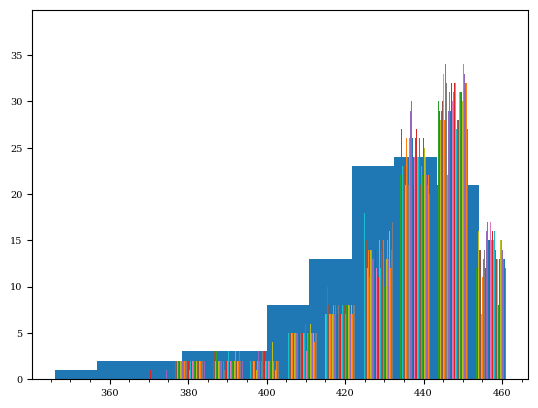

In [20]:
print(log_prob.shape)
#corner.corner(samples[10,:,:])
plt.hist(true_log_prob)
plt.hist(log_prob)
print(true_log_prob[10])
plt.show()

In [5]:
coverage_gauss, coverage_gauss_lo, coverage_gauss_hi = run_inference_test(alpha_vec, log_prob, true_log_prob,
                                                                              title='Gaussian Lhood MSE', show=False)
coverage_gauss_chi, coverage_gauss_lo_chi, coverage_gauss_hi_chi = run_inference_test(alpha_vec, log_prob_chi, true_log_prob_chi, 
                                                                              title='Gaussian Lhood Chi', show=False)
coverage_gauss_fft, coverage_gauss_lo_fft, coverage_gauss_hi_fft = run_inference_test(alpha_vec,log_prob_fft, true_log_prob_fft,
                                                                              title='Gaussian Lhood MSE+FFT', show=False)

-------------------------------------------------------------------------
Full Inference test results for nqsos=100
-------------------------------------------------------------------------
Full    : 0.0 + 0.0 - 0.0 % for alpha=0.000 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=1.004 %
Full    : 1.0 + 1.0 - 1.0 % for alpha=2.008 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=3.012 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=4.016 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=5.020 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=6.024 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=7.028 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=8.032 %
Full    : 6.0 + 2.0 - 2.0 % for alpha=9.036 %
Full    : 6.0 + 2.0 - 2.0 % for alpha=10.040 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=11.044 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=12.048 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=13.053 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=14.057 %
Full    : 8.0 + 3.0 - 3.0 % for alpha=15.061 %
Full    : 8.0 + 3.0 - 3.0 % for alpha=16.065 %
Full    : 8.0 + 3.0 -

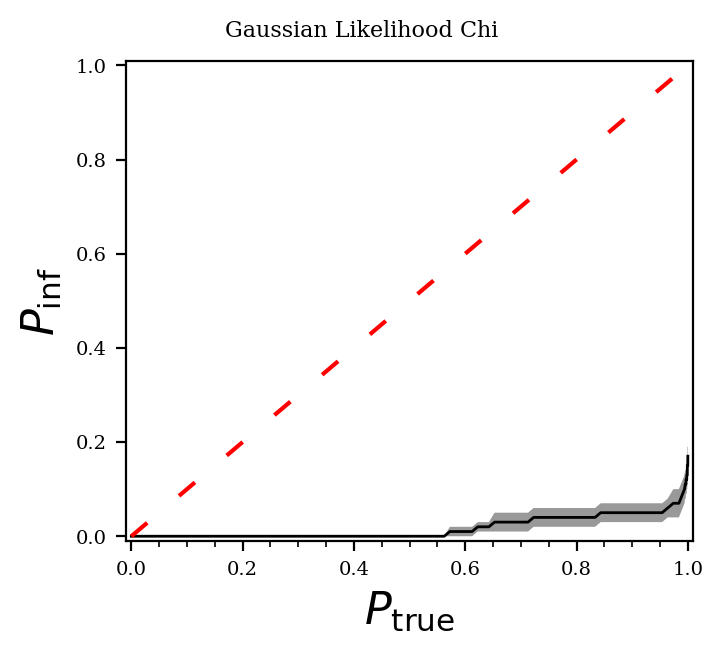

In [7]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_chi, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_chi, coverage_gauss_hi_chi, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Gaussian Likelihood Chi')
#inference_fig.savefig(out_path + f'{note_chi}.png')

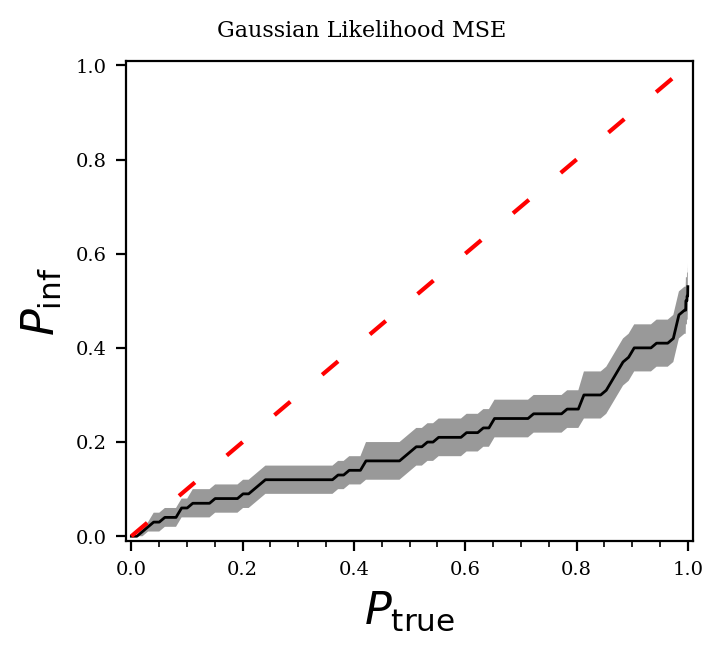

In [8]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo, coverage_gauss_hi, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Gaussian Likelihood MSE')
#inference_fig.savefig(out_path + f'{note}.png')

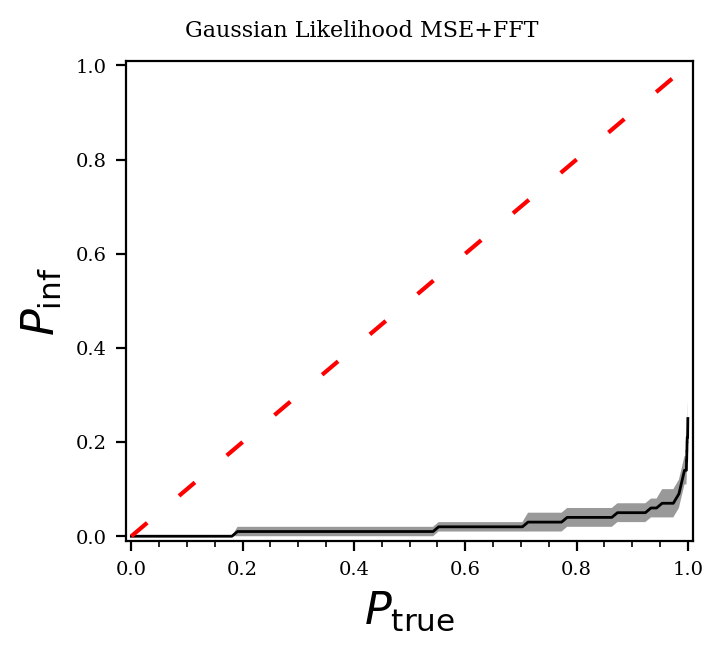

In [9]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_fft, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_fft, coverage_gauss_hi_fft, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Gaussian Likelihood MSE+FFT')
#inference_fig.savefig(out_path + f'{note_fft}.png')

In [10]:
in_path_best_params = os.path.expanduser('~') + f'/igm_emulator/igm_emulator/emulator/best_params/'
f = h5py.File(in_path_best_params + f'z{redshift}_nn_savefile.hdf5', 'r')
mse_name = 'z54_training_768_bin59_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59]_savefile.hdf5'
chi_name = 'z54_training_768_bin59_chi_one_covariance_l2_0.01_activation_leaky_relu_layers_[100, 100, 100, 59]_savefile.hdf5'
f2 = h5py.File(in_path_best_params + mse_name, 'r')
f3 = h5py.File(in_path_best_params + chi_name, 'r')
for name in f:
    print(name)

best_params
data
haiku_nn
performance


In [11]:
print(f['performance'].attrs.keys())
print(f['performance'].attrs['R2'],f['performance'].attrs['test_loss'],f['performance'].attrs['residuals_results'])
print(f2['performance'].attrs['R2'],f2['performance'].attrs['test_loss'],f2['performance'].attrs['residuals_results'])
print(f3['performance'].attrs['R2'],f3['performance'].attrs['test_loss'],f3['performance'].attrs['residuals_results'])

<KeysViewHDF5 ['R2', 'residuals_results', 'test_loss', 'train_loss', 'vali_loss']>
0.9996476034059566 0.005123976639811164 0.026061927159740227% +/- 0.4202427281480411%
0.9997700079795759 0.00461671767231482 0.017405881952497225% +/- 0.5343826072030757%
0.9996502075414873 11.538320903320626 0.36986104690949634% +/- 0.5656398868316764%


## Emulator Gaussian Mocks w/ NGP

-------------------------------------------------------------------------
Full Inference test results for nqsos=100
-------------------------------------------------------------------------
Full    : 0.0 + 0.0 - 0.0 % for alpha=0.000 %
Full    : 0.0 + 0.0 - 0.0 % for alpha=1.004 %
Full    : 1.0 + 1.0 - 1.0 % for alpha=2.008 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=3.012 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=4.016 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=5.020 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=6.024 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=7.028 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=8.032 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=9.036 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=10.040 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=11.044 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=12.048 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=13.053 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=14.057 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=15.061 %
Full    : 5.0 + 2.0 - 2.0 % for alpha=16.065 %
Full    : 6.0 + 2.0 -

Text(0.5, 0.98, 'Emulator Mocks MSE')

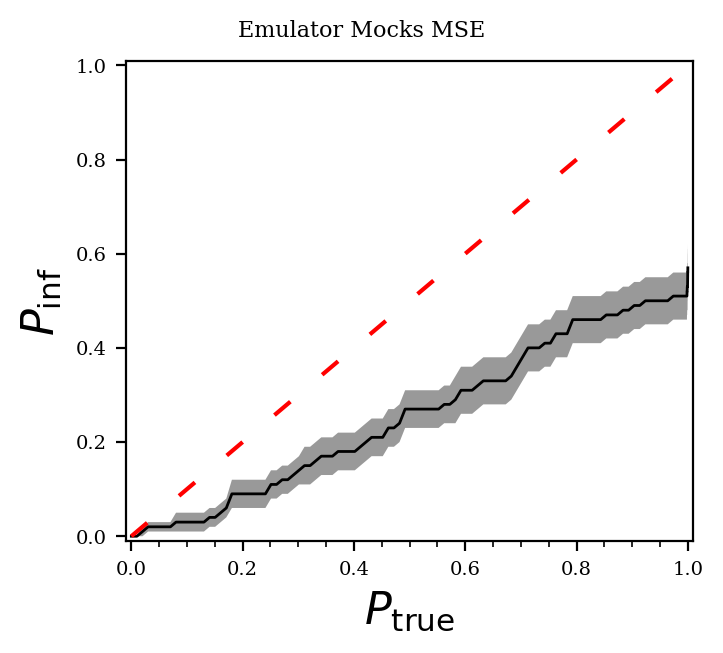

In [46]:
in_path_hdf5 = '/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/'
note_emu ='z54_training_768_bin59_inference_100_gaussain_emulator_samples_1000_chains_4_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59]'
with h5py.File(in_path_hdf5 + f'{note_emu}.hdf5', 'r') as f:
    true_theta_emu = f['true_theta'][:, :]
    log_prob_emu = f['log_prob'][:, :]
    true_log_prob_emu = -1*f['true_log_prob'][:]
    samples_emu = f['samples'][:, :, :]
    infer_theta_emu = f['infer_theta'][:, :]

coverage_gauss_emu, coverage_gauss_lo_emu, coverage_gauss_hi_emu = run_inference_test(alpha_vec, log_prob_emu, true_log_prob_emu,
                                                                              title='Emulator MSE', show=False)

inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_emu, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_emu, coverage_gauss_hi_emu, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Emulator Mocks MSE')
#inference_fig.savefig(out_path + f'{note_emu}.png')

# Gaussian mocks on prior w/ NGP

In [48]:
in_path_hdf5 = '/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/'
note_gaussian = 'z54_training_768_bin59_inference_100_gaussian_mocks_prior_x_samples_1000_chains_4_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59]'
print('reading in')
with h5py.File(in_path_hdf5 + f'{note_gaussian}.hdf5', 'r') as f:
    print(f.keys())
    true_theta_gaussian = f['true_theta'][:, :]
    log_prob_gaussian = f['log_prob_x'][:, :]
    true_log_prob_gaussian = f['true_log_prob_x'][:]
    samples_gaussian = f['samples_theta'][:, :, :]
    infer_theta_gaussian = f['infer_theta'][:, :]
note_gaussian_chi = 'z54_training_768_bin59_inference_100_gaussian_mocks_prior_x_samples_1000_chains_4_chi_one_covariance_l2_0.01_activation_leaky_relu_layers_[100, 100, 100, 59]'
print('reading in')
with h5py.File(in_path_hdf5 + f'{note_gaussian_chi}.hdf5', 'r') as f:
    # IPython.embed()
    true_theta_gaussian_chi = f['true_theta'][:, :]
    log_prob_gaussian_chi = f['log_prob_x'][:, :]
    true_log_prob_gaussian_chi = f['true_log_prob_x'][:]
    samples_gaussian_chi = f['samples_theta'][:, :, :]
    infer_theta_gaussian_chi = f['infer_theta'][:, :]

reading in
<KeysViewHDF5 ['infer_theta', 'log_prob_x', 'samples_theta', 'true_log_prob_x', 'true_theta']>
reading in


In [49]:
coverage_gauss_gaussian, coverage_gauss_lo_gaussian, coverage_gauss_hi_gaussian = run_inference_test(alpha_vec, log_prob_gaussian, true_log_prob_gaussian,
                                                                              title='Gaussian Lhood MSE', show=False)
coverage_gauss_gaussian_chi, coverage_gauss_lo_gaussian_chi, coverage_gauss_hi_gaussian_chi = run_inference_test(alpha_vec, log_prob_gaussian_chi, true_log_prob_gaussian_chi,
                                                                              title='Gaussian Lhood MSE', show=False)

-------------------------------------------------------------------------
Full Inference test results for nqsos=100
-------------------------------------------------------------------------
Full    : 1.0 + 1.0 - 1.0 % for alpha=0.000 %
Full    : 1.0 + 1.0 - 1.0 % for alpha=1.004 %
Full    : 1.0 + 1.0 - 1.0 % for alpha=2.008 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=3.012 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=4.016 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=5.020 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=6.024 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=7.028 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=8.032 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=9.036 %
Full    : 6.0 + 2.0 - 2.0 % for alpha=10.040 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=11.044 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=12.048 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=13.053 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=14.057 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=15.061 %
Full    : 8.0 + 3.0 - 3.0 % for alpha=16.065 %
Full    : 9.0 + 3.0 -

Text(0.5, 0.98, 'Gaussian Mocks MSE on Prior')

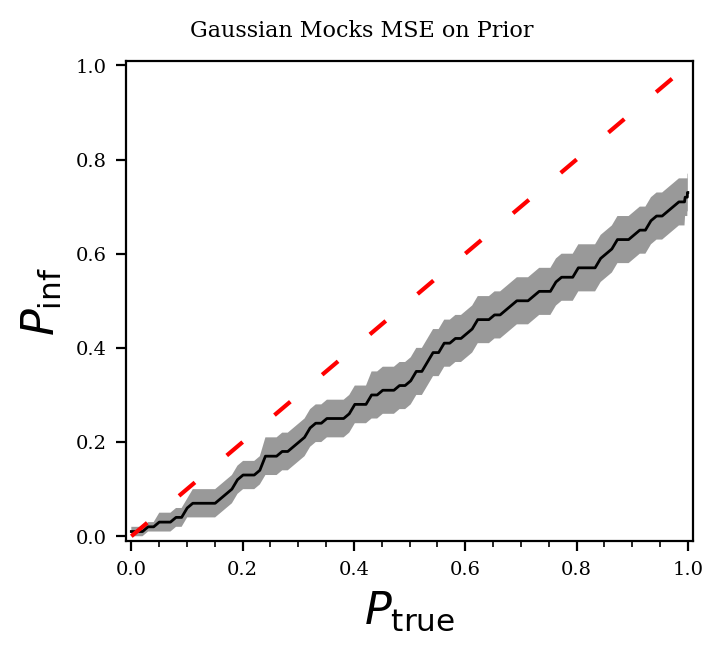

In [50]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_gaussian, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_gaussian, coverage_gauss_hi_gaussian, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Gaussian Mocks MSE on Prior')
#inference_fig.savefig(out_path + f'{note_gaussian}.png')

Text(0.5, 0.98, 'Gaussian Mocks Chi')

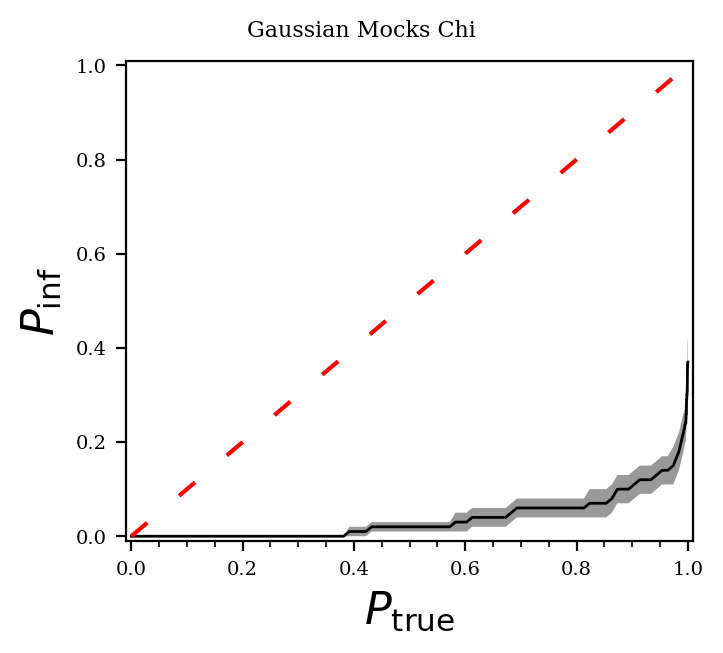

In [51]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_gaussian_chi, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_gaussian_chi, coverage_gauss_hi_gaussian_chi, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Gaussian Mocks Chi')
#inference_fig.savefig(out_path + f'{note_gaussian_chi}.png')

## Emulator Gaussian Mocks Sampling on Prior w/NGP

In [29]:
in_path_hdf5 = '/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/'
note_emu = 'z54_training_768_bin59_inference_100_gaussian_emulator_prior_x_samples_1000_chains_4_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59]'
with h5py.File(in_path_hdf5 + f'{note_emu}.hdf5', 'r') as f:
    f.keys()
    true_theta_emu = f['true_theta'][:, :]
    log_prob_emu = f['log_prob_x'][:, :]
    true_log_prob_emu =f['true_log_prob_x'][:]
    samples_emu = f['samples_theta'][:, :, :]
    infer_theta_emu = f['infer_theta'][:, :]

coverage_gauss_emu, coverage_gauss_lo_emu, coverage_gauss_hi_emu = run_inference_test(alpha_vec, log_prob_emu, true_log_prob_emu,
                                                                              title='Emulator Mocks MSE on Prior', show=False)

-------------------------------------------------------------------------
Full Inference test results for nqsos=100
-------------------------------------------------------------------------
Full    : 0.0 + 0.0 - 0.0 % for alpha=0.000 %
Full    : 1.0 + 1.0 - 1.0 % for alpha=1.004 %
Full    : 1.0 + 1.0 - 1.0 % for alpha=2.008 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=3.012 %
Full    : 7.0 + 3.0 - 3.0 % for alpha=4.016 %
Full    : 8.0 + 3.0 - 3.0 % for alpha=5.020 %
Full    : 9.0 + 3.0 - 3.0 % for alpha=6.024 %
Full    : 10.0 + 3.0 - 3.0 % for alpha=7.028 %
Full    : 11.0 + 3.0 - 3.0 % for alpha=8.032 %
Full    : 12.0 + 3.0 - 3.0 % for alpha=9.036 %
Full    : 14.0 + 3.0 - 3.0 % for alpha=10.040 %
Full    : 15.0 + 4.0 - 4.0 % for alpha=11.044 %
Full    : 17.0 + 4.0 - 4.0 % for alpha=12.048 %
Full    : 18.0 + 4.0 - 4.0 % for alpha=13.053 %
Full    : 19.0 + 4.0 - 4.0 % for alpha=14.057 %
Full    : 20.0 + 4.0 - 4.0 % for alpha=15.061 %
Full    : 21.0 + 4.0 - 4.0 % for alpha=16.065 %
Full    : 2

Text(0.5, 0.98, 'Emulator Mocks MSE on Prior')

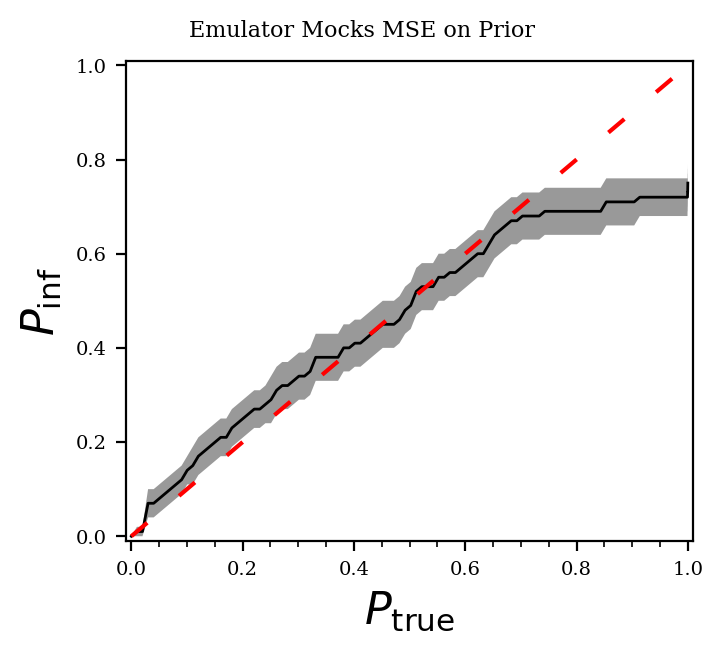

In [30]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_emu, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_emu, coverage_gauss_hi_emu, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Emulator Mocks MSE on Prior')
#inference_fig.savefig(out_path + f'{note_emu}.png')

Text(0.5, 0, '$\\gamma$')

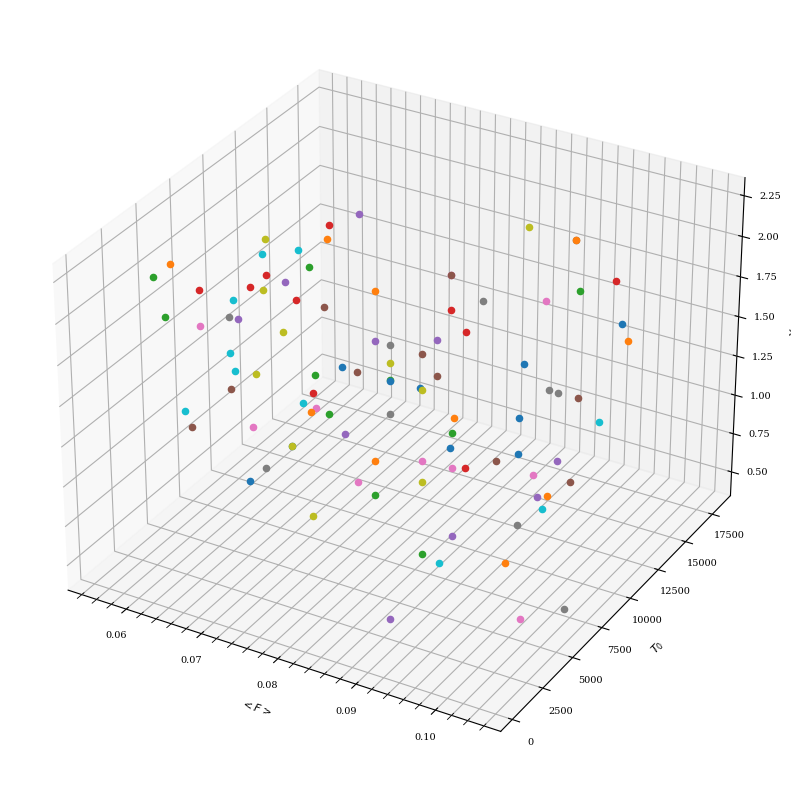

In [31]:
fig3d = plt.figure(figsize=(10, 10))
ax3d = plt.axes(projection='3d')
for i in range(true_theta_emu.shape[0]):
    ax3d.scatter(true_theta_emu[i,0], true_theta_emu[i,1], true_theta_emu[i,2],  linewidth=1)
ax3d.set_xlabel(r'$<F>$')
ax3d.set_ylabel(r'$T_0$')
ax3d.set_zlabel(r'$\gamma$')

Text(0.5, 0, '$\\gamma$')

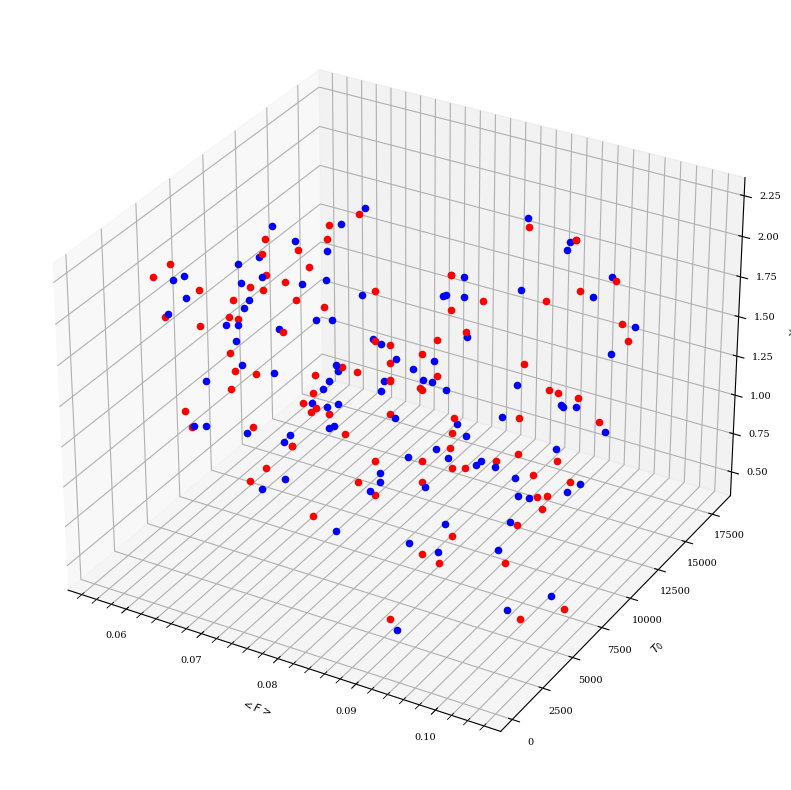

In [32]:
out_path = '/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/'
theta_ngp = dill.load(open(out_path + 'gaussian_emulator_prior_x_theta_inference100_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59].p', 'rb'))
theta_sampled = dill.load(open(out_path + 'gaussian_emulator_prior_x_theta_sampled_inference100_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59].p', 'rb'))

fig3d = plt.figure(figsize=(10, 10))
ax3d = plt.axes(projection='3d')
for i in range(theta_ngp.shape[0]):
    ax3d.scatter(theta_ngp[i,0], theta_ngp[i,1], theta_ngp[i,2],  linewidth=1,color='r')
    ax3d.scatter(theta_sampled[i,2], theta_sampled[i,0], theta_sampled[i,1], linewidth=1,color='b')

ax3d.set_xlabel(r'$<F>$')
ax3d.set_ylabel(r'$T_0$')
ax3d.set_zlabel(r'$\gamma$')

(100, 4000) (100,)
443.5375472703949


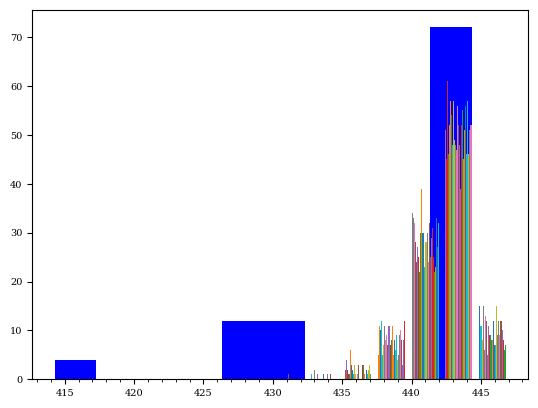

In [38]:
print(log_prob_emu.shape,true_log_prob_emu.shape)
#corner.corner(samples[10,:,:])
plt.hist(true_log_prob_emu,color='b')
plt.hist(log_prob_emu)
print(true_log_prob_emu[10])
plt.show()

In [12]:
true_theta_sampled = dill.load(open('/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/' + 'gaussian_emulator_prior_x_theta_inference100_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59].p','rb'))

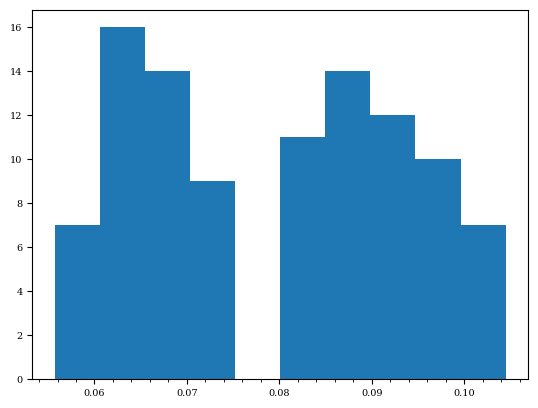

In [40]:
plt.hist(theta_ngp[:,0])
#plt.hist(true_theta_emu[:,0],color='r')
plt.show()

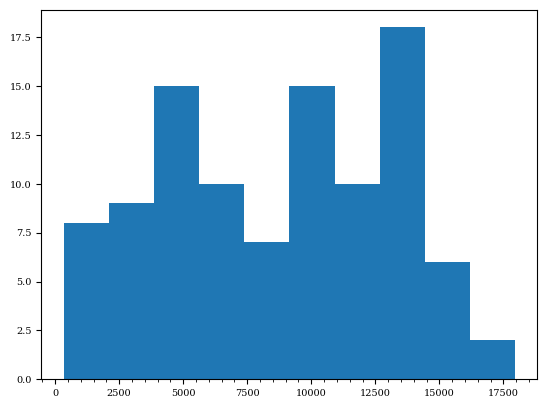

In [45]:
plt.hist(theta_ngp[:,1])
#plt.hist(true_theta_emu[:,1],color='r')
plt.show()

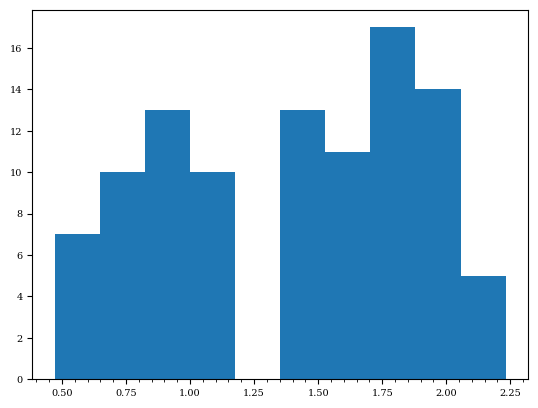

In [42]:
plt.hist(theta_ngp[:,2])
#plt.hist(true_theta_emu[:,2],color='r')
plt.show()

## Emulator Gaussian without NGP

In [9]:
in_path_hdf5 = '/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/'
note_emu_off_grid = 'z54_training_768_bin59_inference_100_gaussian_emulator_prior_x_no_grids_samples_1000_chains_4_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59]'

with h5py.File(in_path_hdf5 + f'{note_emu_off_grid}.hdf5', 'r') as f:
    print(f.keys())
    true_theta_emu_off_grid = f['true_theta'][:, :]
    log_prob_emu_off_grid = f['log_prob_x'][:, :]
    true_log_prob_emu_off_grid = f['true_log_prob_x'][:]
    samples_emu_off_grid = f['samples_theta'][:, :, :]
    infer_theta_emu_off_grid = f['infer_theta'][:, :]

coverage_gauss_emu_off_grid, coverage_gauss_lo_emu_off_grid, coverage_gauss_hi_emu_off_grid = run_inference_test(alpha_vec, log_prob_emu_off_grid, true_log_prob_emu_off_grid,
                                                                              title='Emulator Mocks MSE on Prior off grid', show=False)

<KeysViewHDF5 ['infer_theta', 'log_prob_x', 'samples_theta', 'true_log_prob_x', 'true_theta']>
-------------------------------------------------------------------------
Full Inference test results for nqsos=100
-------------------------------------------------------------------------
Full    : 0.0 + 0.0 - 0.0 % for alpha=0.000 %
Full    : 2.0 + 1.0 - 1.0 % for alpha=1.004 %
Full    : 3.0 + 2.0 - 2.0 % for alpha=2.008 %
Full    : 4.0 + 2.0 - 2.0 % for alpha=3.012 %
Full    : 6.0 + 2.0 - 2.0 % for alpha=4.016 %
Full    : 9.0 + 3.0 - 3.0 % for alpha=5.020 %
Full    : 11.0 + 3.0 - 3.0 % for alpha=6.024 %
Full    : 11.0 + 3.0 - 3.0 % for alpha=7.028 %
Full    : 12.0 + 3.0 - 3.0 % for alpha=8.032 %
Full    : 15.0 + 4.0 - 4.0 % for alpha=9.036 %
Full    : 15.0 + 4.0 - 4.0 % for alpha=10.040 %
Full    : 15.0 + 4.0 - 4.0 % for alpha=11.044 %
Full    : 17.0 + 4.0 - 4.0 % for alpha=12.048 %
Full    : 19.0 + 4.0 - 4.0 % for alpha=13.053 %
Full    : 20.0 + 4.0 - 4.0 % for alpha=14.057 %
Full    : 2

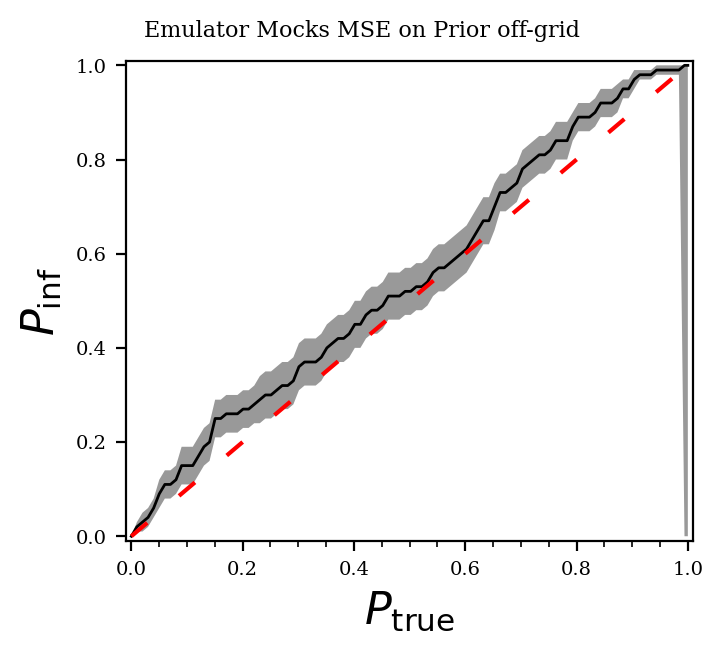

In [10]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_emu_off_grid, color='black', linestyle='solid', label='inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_emu_off_grid, coverage_gauss_hi_emu_off_grid, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Emulator Mocks MSE on Prior off-grid')
#inference_fig.savefig(out_path + f'{note_emu_off_grid}.png')

Text(0.5, 0, '$\\gamma$')

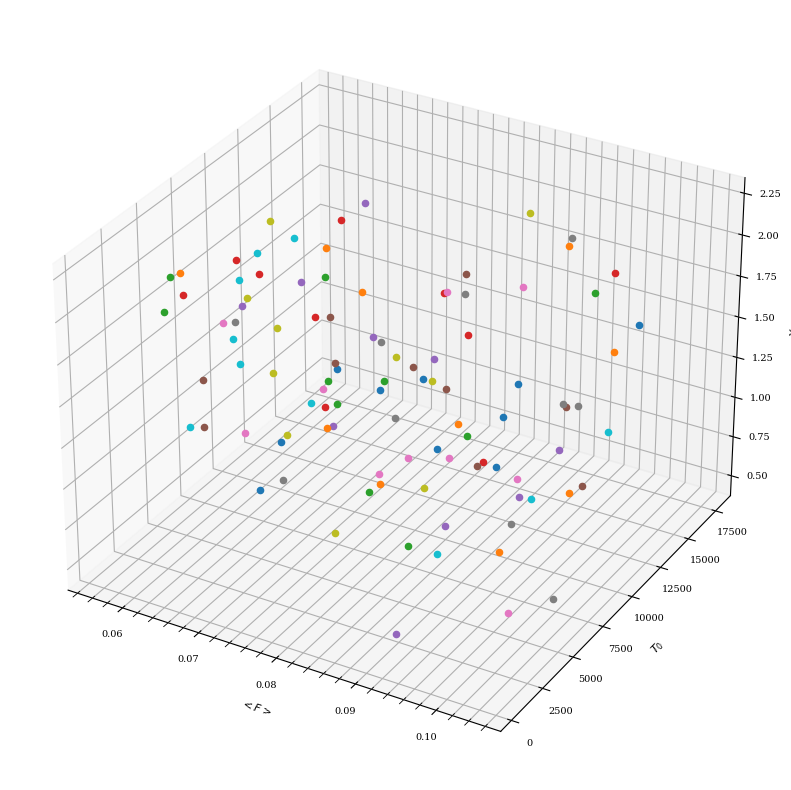

In [12]:
fig3d = plt.figure(figsize=(10, 10))
ax3d = plt.axes(projection='3d')
for i in range(true_theta_emu_off_grid.shape[0]):
    ax3d.scatter(true_theta_emu_off_grid[i,0], true_theta_emu_off_grid[i,1], true_theta_emu_off_grid[i,2],  linewidth=1)
ax3d.set_xlabel(r'$<F>$')
ax3d.set_ylabel(r'$T_0$')
ax3d.set_zlabel(r'$\gamma$')

Text(0.5, 0, '$\\gamma$')

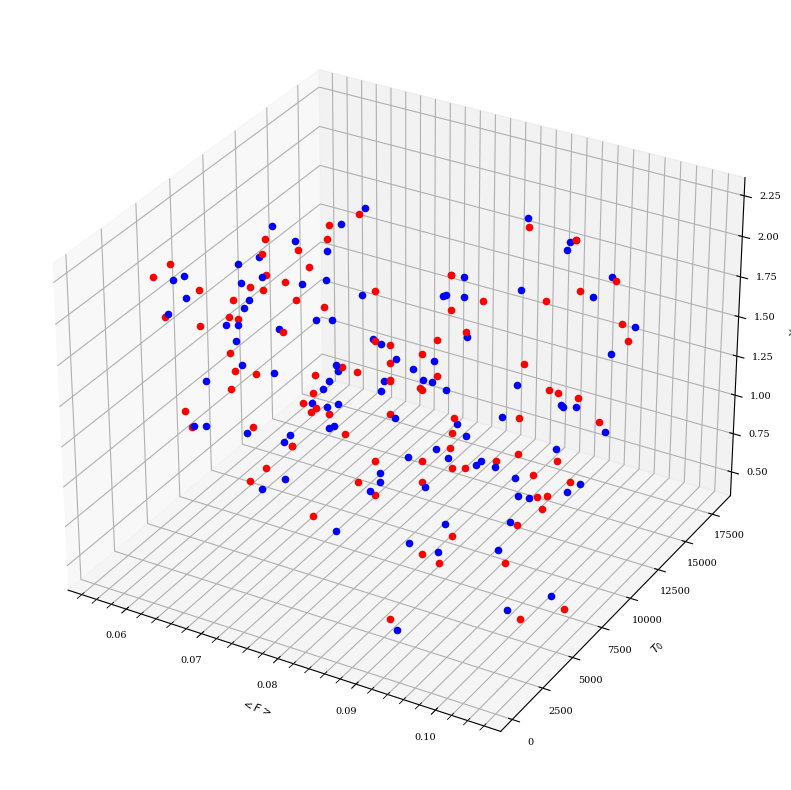

In [17]:
true_theta_ngp = np.empty([100, 3])
for mock_idx in range(true_theta_emu_off_grid.shape[0]):
    closest_temp_idx = np.argmin(np.abs(T0s - true_theta_emu_off_grid[mock_idx, 1]))
    closest_gamma_idx = np.argmin(np.abs(gammas - true_theta_emu_off_grid[mock_idx, 2]))
    closest_fobs_idx = np.argmin(np.abs(fobs - true_theta_emu_off_grid[mock_idx, 0]))

    true_theta_ngp[mock_idx, :] = [fobs[closest_fobs_idx], T0s[closest_temp_idx], gammas[closest_gamma_idx]]
    
fig3d = plt.figure(figsize=(10, 10))
ax3d = plt.axes(projection='3d')
for i in range(true_theta_ngp.shape[0]):
    ax3d.scatter(true_theta_ngp[i,0], true_theta_ngp[i,1], true_theta_ngp[i,2],  linewidth=1,color='r')
    ax3d.scatter(true_theta_emu_off_grid[i,0], true_theta_emu_off_grid[i,1], true_theta_emu_off_grid[i,2], linewidth=1,color='b')

ax3d.set_xlabel(r'$<F>$')
ax3d.set_ylabel(r'$T_0$')
ax3d.set_zlabel(r'$\gamma$')

## 500 samples emulator gaussianized on prior without NGP

In [4]:
in_path_hdf5 = '/mnt/quasar2/zhenyujin/igm_emulator/hmc/hmc_results/'
note_emu_off_grid_500 = 'z54_training_768_bin59_inference_500_gaussian_emulator_prior_x_no_grids_samples_1000_chains_4_mse_l2_0.0001_activation_leaky_relu_layers_[100, 100, 100, 59]'

with h5py.File(in_path_hdf5 + f'{note_emu_off_grid_500}.hdf5', 'r') as f:
    print(f.keys())
    true_theta_emu_off_grid_500 = f['true_theta'][:, :]
    log_prob_emu_off_grid_500 = f['log_prob_x'][:, :]
    true_log_prob_emu_off_grid_500 = f['true_log_prob_x'][:]
    samples_emu_off_grid_500 = f['samples_theta'][:, :, :]
    infer_theta_emu_off_grid_500 = f['infer_theta'][:, :]

coverage_gauss_emu_off_grid_500, coverage_gauss_lo_emu_off_grid_500, coverage_gauss_hi_emu_off_grid_500 = run_inference_test(alpha_vec, log_prob_emu_off_grid_500, true_log_prob_emu_off_grid_500,
                                                                              title='Emulator 500 Mocks MSE on Prior off grid', show=False)

<KeysViewHDF5 ['infer_theta', 'log_prob_x', 'samples_theta', 'true_log_prob_x', 'true_theta']>
-------------------------------------------------------------------------
Full Inference test results for nqsos=500
-------------------------------------------------------------------------
Full    : 0.0 + 0.0 - 0.0 % for alpha=0.000 %
Full    : 1.0 + 0.4 - 0.4 % for alpha=1.004 %
Full    : 2.0 + 0.6 - 0.6 % for alpha=2.008 %
Full    : 2.4 + 0.6 - 0.6 % for alpha=3.012 %
Full    : 4.0 + 0.8 - 0.8 % for alpha=4.016 %
Full    : 5.4 + 1.0 - 1.0 % for alpha=5.020 %
Full    : 5.8 + 1.0 - 1.0 % for alpha=6.024 %
Full    : 6.8 + 1.2 - 1.2 % for alpha=7.028 %
Full    : 8.0 + 1.2 - 1.2 % for alpha=8.032 %
Full    : 8.8 + 1.2 - 1.2 % for alpha=9.036 %
Full    : 10.4 + 1.4 - 1.4 % for alpha=10.040 %
Full    : 11.8 + 1.4 - 1.4 % for alpha=11.044 %
Full    : 12.4 + 1.4 - 1.4 % for alpha=12.048 %
Full    : 14.0 + 1.6 - 1.6 % for alpha=13.053 %
Full    : 14.8 + 1.6 - 1.6 % for alpha=14.057 %
Full    : 16.6 

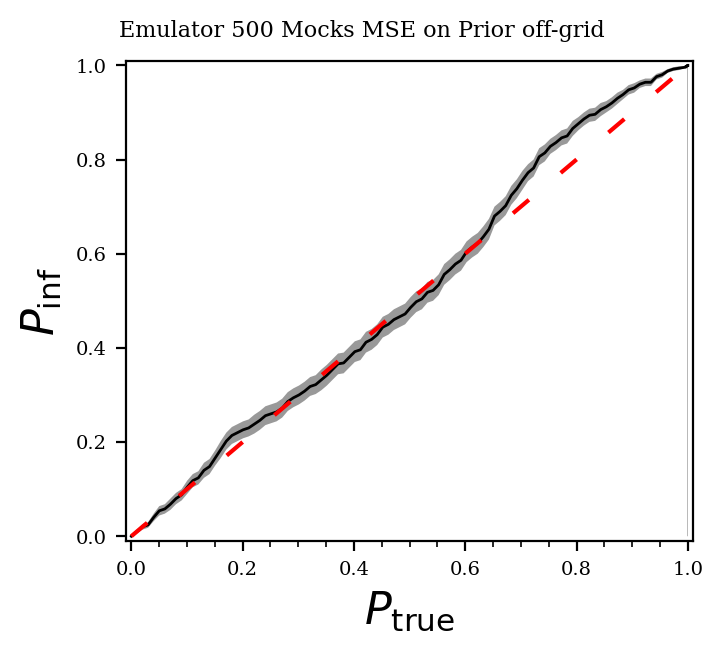

In [5]:
inference_fig = plt.figure(figsize=(x_size, x_size*.9), constrained_layout=True,
                           dpi=dpi_value,
                           )
grid = inference_fig.add_gridspec(
    nrows=1, ncols=1,  # height_ratios=[1, 1], width_ratios=[1, 1],
)

skew_ax = inference_fig.add_subplot(grid[0])

skew_ax.plot(alpha_vec, coverage_gauss_emu_off_grid_500, color='black', linestyle='solid', label='500 inference test points', zorder=10)
skew_ax.fill_between(alpha_vec, coverage_gauss_lo_emu_off_grid_500, coverage_gauss_hi_emu_off_grid_500, facecolor='grey', alpha=0.8, zorder=3)
x_vec = np.linspace(0.0, 1.0, 11)
skew_ax.plot(x_vec, x_vec, linewidth=1.5, color='red', linestyle=(0,(5,10)), zorder=20, label='inferred model')

skew_ax.set_xlim((-0.01, 1.01))
skew_ax.set_ylim((-0.01, 1.01))
skew_ax.set_xlabel(r'$P_{{\rm true}}$', fontsize=16)
skew_ax.set_ylabel(r'$P_{{\rm inf}}$', fontsize=16)


out_path = f'/mnt/quasar2/zhenyujin/igm_emulator/hmc/plots/{z_string}/'
inference_fig.suptitle(f'Emulator 500 Mocks MSE on Prior off-grid')
#inference_fig.savefig(out_path + f'{note_emu_off_grid_500}.png')

Text(0.5, 0, '$\\gamma$')

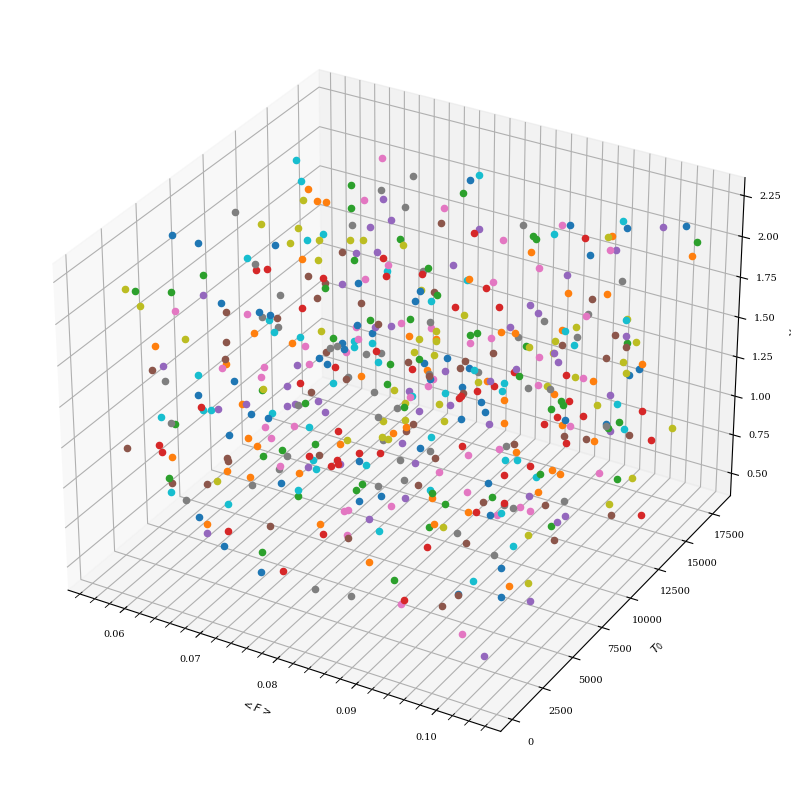

In [7]:
fig3d = plt.figure(figsize=(10, 10))
ax3d = plt.axes(projection='3d')
for i in range(true_theta_emu_off_grid_500.shape[0]):
    ax3d.scatter(true_theta_emu_off_grid_500[i,0], true_theta_emu_off_grid_500[i,1], true_theta_emu_off_grid_500[i,2],  linewidth=1)
ax3d.set_xlabel(r'$<F>$')
ax3d.set_ylabel(r'$T_0$')
ax3d.set_zlabel(r'$\gamma$')